# ANN using Bank Customer Churn dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../../datasets/bank_Churn.csv')
df.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
7694,7695,15807335,Spencer,676,Spain,Female,64,4,116954.32,1,1,1,91149.48,0
9060,9061,15770474,Myers,685,France,Female,33,1,0.00,3,0,1,70221.13,1
3439,3440,15662063,McIver,746,France,Male,36,7,142400.77,1,1,1,193438.69,0
5178,5179,15794849,Aitken,850,Germany,Male,22,7,91560.58,2,0,0,10541.38,0
729,730,15612525,Preston,499,France,Female,57,1,0.00,1,0,0,131372.38,1


## Data Expolration

In [3]:
df.shape

(10000, 14)

In [4]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [5]:
df.Geography.value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

## Data Cleaning

In [6]:
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis='columns', inplace=True)
df.sample(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9711,521,Germany,Male,41,8,120586.54,1,0,1,20491.15,0
8280,706,Spain,Male,53,7,0.00,2,0,1,117939.17,0
3952,594,France,Female,34,7,141525.55,1,0,0,9443.15,0
6990,660,France,Male,41,3,0.00,2,1,1,108665.89,0
9421,613,France,Male,34,5,144094.20,1,1,0,44510.26,0
1598,601,Germany,Female,48,8,120782.70,1,1,0,63940.68,1
6103,655,France,Male,28,10,0.00,2,0,1,126565.21,0
6670,758,Spain,Female,43,10,0.00,2,1,1,55313.44,0
1796,555,France,Male,37,9,124969.13,1,1,0,60194.05,0
9368,737,France,Male,28,8,0.00,2,1,0,106390.01,0


## Data Visualization

In [7]:
geo_exit0 = df[df['Exited'] == 0].Geography
geo_exit1 = df[df['Exited'] == 1].Geography

In [8]:
geo_exit0.value_counts()

France     4204
Spain      2064
Germany    1695
Name: Geography, dtype: int64

In [9]:
geo_exit1.value_counts()

Germany    814
France     810
Spain      413
Name: Geography, dtype: int64

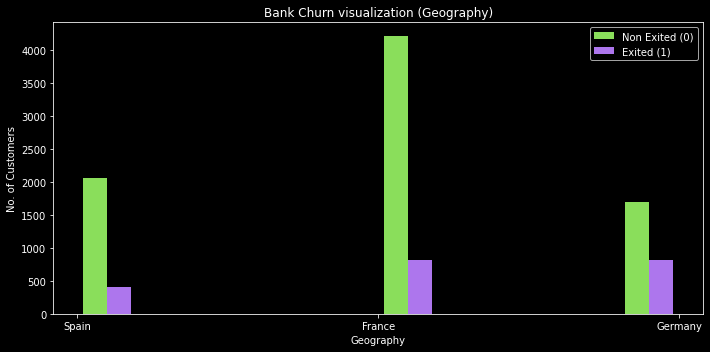

In [10]:
plt.style.use(['dark_background'])
plt.figure(figsize=(10, 5))

plt.title("Bank Churn visualization (Geography)")
plt.ylabel('No. of Customers')
plt.xlabel('Geography')
plt.hist([geo_exit0, geo_exit1], label=['Non Exited (0)', 'Exited (1)'], color=['#8ade5b', '#ad76ed'])
plt.tight_layout()
plt.legend()

from the above visualization we can see that most of the customer exited from _Germany_ and _France_ has the highest customers who stayed<br><br>

In [11]:
tnr_exit0 = df[df['Exited'] == 0].Tenure
tnr_exit1 = df[df['Exited'] == 1].Tenure

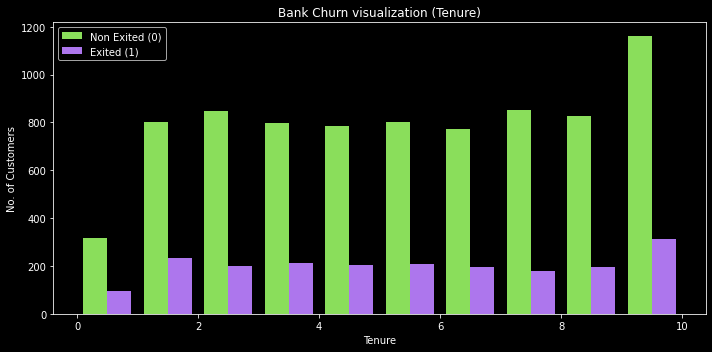

In [12]:
plt.style.use(['dark_background'])
plt.figure(figsize=(10, 5))

plt.title("Bank Churn visualization (Tenure)")
plt.ylabel('No. of Customers')
plt.xlabel('Tenure')
plt.hist([tnr_exit0, tnr_exit1], label=['Non Exited (0)', 'Exited (1)'], color=['#8ade5b', '#ad76ed'])
plt.tight_layout()
plt.legend()

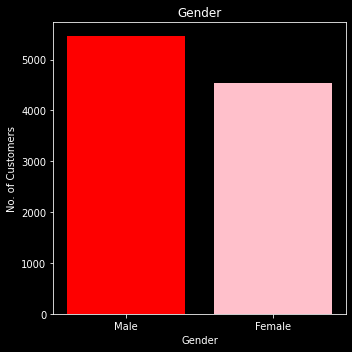

In [13]:
male_c = df[df['Gender'] == 'Male']
female_c = df[df['Gender'] == 'Female']

plt.figure(figsize=(5, 5))

plt.title("Gender")
plt.ylabel('No. of Customers')
plt.xlabel('Gender')

plt.bar(['Male', 'Female'], [len(male_c), len(female_c)], color=['#fe0000', '#ffc0cb'])
plt.tight_layout()

In [14]:
gnd_exit0 = df[df['Exited'] == 0].Gender
gnd_exit1 = df[df['Exited'] == 1].Gender

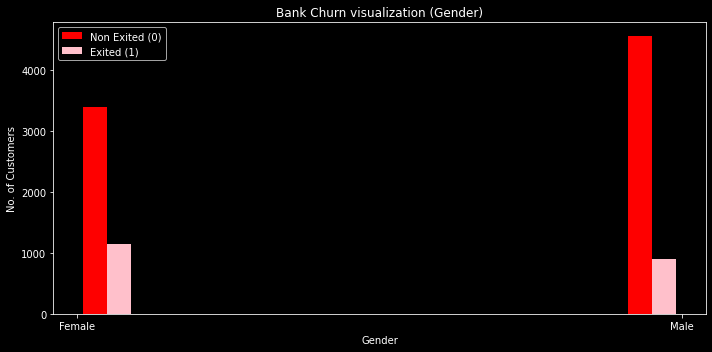

In [15]:
plt.style.use(['dark_background'])
plt.figure(figsize=(10, 5))

plt.title("Bank Churn visualization (Gender)")
plt.ylabel('No. of Customers')
plt.xlabel('Gender')
plt.hist([gnd_exit0, gnd_exit1], label=['Non Exited (0)', 'Exited (1)'], color=['#fe0000', '#ffc0cb'])
plt.tight_layout()
plt.legend()

## Data Preprocessing

In [16]:
#scale the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

col_to_scale = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']

df[col_to_scale] = scaler.fit_transform(df[col_to_scale])

In [17]:
#cvt columns into numerical values usin one hot encoding

df = pd.get_dummies(data=df, columns=['Geography', 'Gender'])

In [18]:
df.sample(10)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
370,0.902,0.324324,0.4,0.565758,1,1,1,0.052939,0,0,0,1,0,1
5080,0.762,0.148649,1.0,0.000000,2,1,1,0.812283,0,1,0,0,0,1
9516,0.414,0.189189,0.3,0.492242,1,1,1,0.349109,0,1,0,0,1,0
8976,0.740,0.148649,0.2,0.000000,2,1,0,0.199589,0,1,0,0,0,1
2547,0.664,0.554054,0.0,0.488889,1,0,1,0.424001,0,0,0,1,1,0
3556,0.480,0.567568,0.6,0.588891,1,1,0,0.441014,1,1,0,0,1,0
7649,0.730,0.175676,0.3,0.440742,1,1,1,0.473564,0,1,0,0,1,0
8531,0.746,0.162162,0.1,0.000000,3,1,0,0.823259,1,0,0,1,0,1
144,0.682,0.175676,0.5,0.163076,1,1,0,0.631072,1,1,0,0,1,0
5889,0.754,0.175676,0.2,0.208021,2,0,1,0.801936,0,1,0,0,1,0


## Train, test split

In [19]:
X = df.drop(['Exited'], axis=1)
y = df['Exited']

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
X_train.shape

(8000, 13)

In [22]:
X_test.shape

(2000, 13)

## Build Model

In [27]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(20, input_shape=(13,), activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

In [29]:
model.fit(X_train, y_train, epochs=100)

Epoch 1/100
250/250 [==============================] - 0s 750us/step - loss: 0.3943 - accuracy: 0.8314
Epoch 2/100
250/250 [==============================] - 0s 786us/step - loss: 0.3802 - accuracy: 0.8376
Epoch 3/100
250/250 [==============================] - 0s 787us/step - loss: 0.3716 - accuracy: 0.8446
Epoch 4/100
250/250 [==============================] - 0s 788us/step - loss: 0.3648 - accuracy: 0.8479
Epoch 5/100
250/250 [==============================] - 0s 827us/step - loss: 0.3611 - accuracy: 0.8494
Epoch 6/100
250/250 [==============================] - 0s 792us/step - loss: 0.3577 - accuracy: 0.8514
Epoch 7/100
250/250 [==============================] - 0s 802us/step - loss: 0.3547 - accuracy: 0.8526
Epoch 8/100
250/250 [==============================] - 0s 806us/step - loss: 0.3542 - accuracy: 0.8544
Epoch 9/100
250/250 [==============================] - 0s 761us/step - loss: 0.3517 - accuracy: 0.8528
Epoch 10/100
250/250 [==============================] - 0s 738us/step - l

## Model Evaluation

In [31]:
model.evaluate(X_test, y_test)

63/63 [==============================] - 0s 700us/step - loss: 0.3418 - accuracy: 0.8590


[0.3417956829071045, 0.859000027179718]

In [39]:
pred = model.predict(X_test)

In [40]:
pred[:5]

array([[0.07297489],
       [0.02328098],
       [0.11457631],
       [0.15820253],
       [0.06186542]], dtype=float32)

In [37]:
y_test[:5]

6252    0
4684    0
1731    0
4742    0
4521    0
Name: Exited, dtype: int64

In [42]:
y_pred = []
for yp in pred:
    if yp >= 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)
        

## Confusion Matrix

In [44]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.95      0.92      1607
           1       0.70      0.49      0.58       393

    accuracy                           0.86      2000
   macro avg       0.79      0.72      0.75      2000
weighted avg       0.85      0.86      0.85      2000



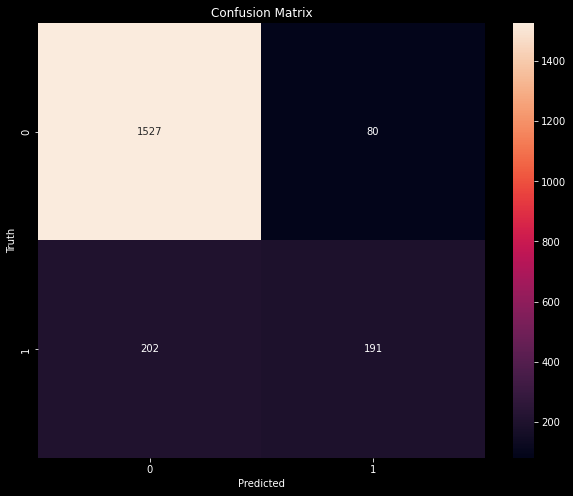

In [63]:
import seaborn as sns

cm = tf.math.confusion_matrix(labels=y_test, predictions=y_pred)
plt.figure(figsize = (10,8))

sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion Matrix')
plt.show()

### Acurracy

In [70]:
#Acurracy = (TP+TN) + (TP+TN+FP+FN)

Accuracy = round((1527+191)/(1527+191+202+80), 2)
print(f'Accuracy: {Accuracy}')

Accuracy: 0.86


### Precision (Predicted)

In [79]:
#precision_0
# p = TP/(TP+TN)

TP = 1527
TP_TN = (1527+202)
prec_0 = TP/TP_TN

print(f'Precision for Non-Exited(0): {round(prec_0, 2)}')

Precision for Non-Exited(0): 0.88


In [88]:
#precision_1
# p = TP/(TP+TN)

TN = 191
FN_TN = (80+191)
prec_1 = TN/FN_TN

print(f'Precision for Exited(1): {round(prec_1, 2)}')

Precision for Exited(1): 0.7


### Recall (Truth)

In [89]:
#recall_0
#recall = TP/(TP+FN)

TP=1527
TP_FP=1527+80
recall_0 = round(TP/(TP_FP),2)

print(f'Recall for Non-Exited(0): {recall_0}')

Recall for Non-Exited(0): 0.95


In [90]:
#recall_1
#recall = TP/(TP+FN)

TN=191
TN_FP=202+191
recall_1 = round(TN/(TN_FP),2)

print(f'Recall for Exited(1): {recall_1}')

Recall for Exited(1): 0.49


### f1-score

In [95]:
#f1-score_0
# (precision x recall)/(precision + recall)

f1_score_0 = round(2*(prec_0 * recall_0)/(prec_0 + recall_0), 2)
print(f'F1-score for Non-Exited(0): {f1_score_0}')

F1-score for Non-Exited(0): 0.92


In [96]:
#f1-score_1
# (precision x recall)/(precision + recall)

f1_score_1 = round(2*(prec_1 * recall_1)/(prec_1 + recall_1), 2)
print(f'F1-score for Exited(1): {f1_score_1}')

F1-score for Exited(1): 0.58
